## set up notebook

In [18]:
library(purrr)
library(readr)
library(dplyr, warn.conflicts = F)
library(tidyr)
library(ggplot2)
library(wordcloud)

Loading required package: RColorBrewer



In [2]:
setwd("..")

In [9]:
# adjust plot size rendered inline
options(repr.plot.width = 4, repr.plot.height = 3.5, repr.plot.res = 300)

## read in results

In [5]:
results <- read_tsv("outputs/hgt_candidates_final/results_fungi.tsv", show_col_types = F)
method_tally <- read_tsv("outputs/hgt_candidates_final/method_tally_fungi.tsv", show_col_types = F)

## plot number of HGT candidates per method

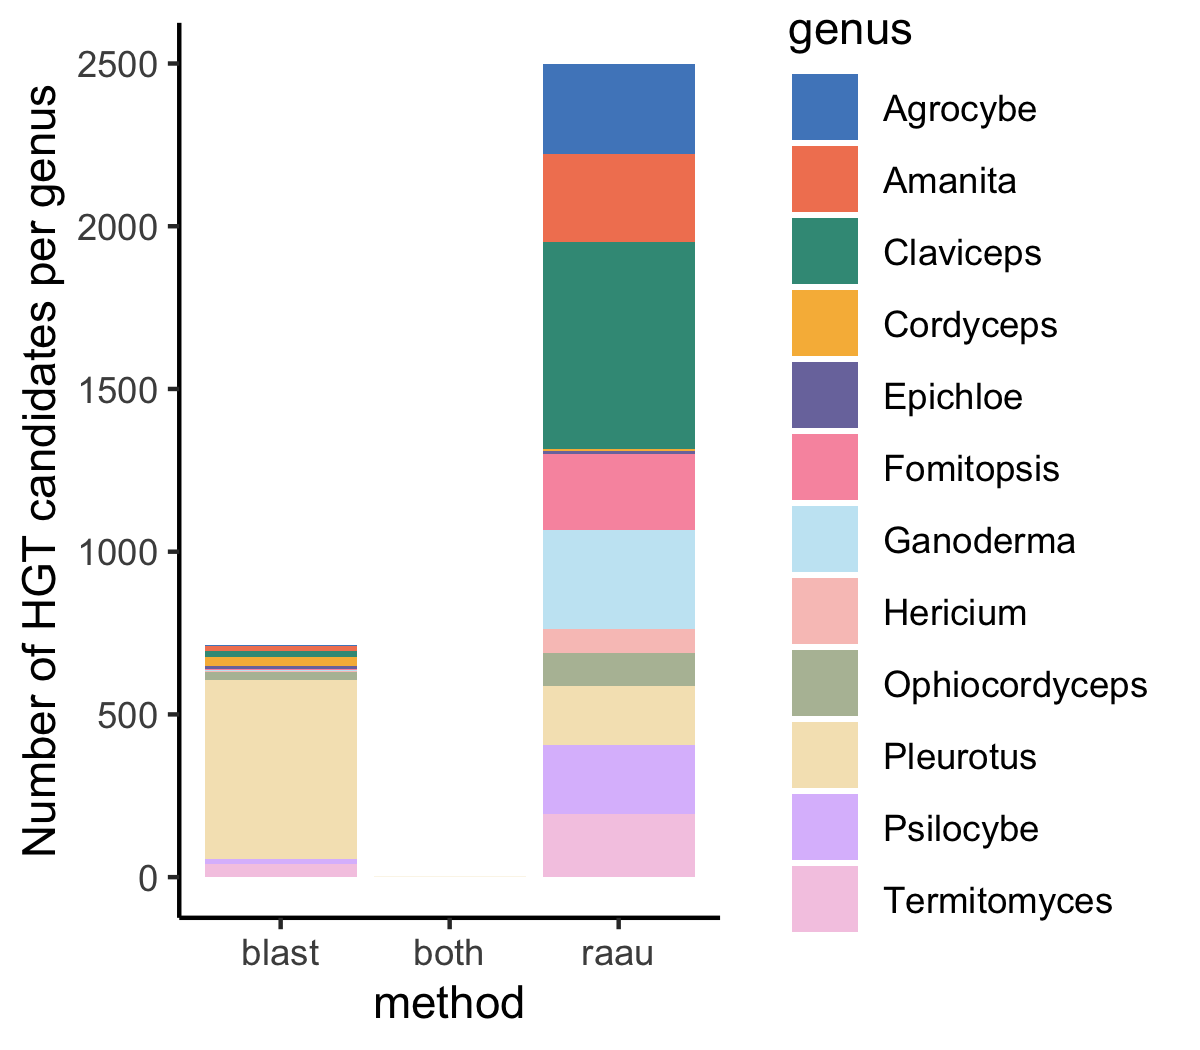

In [10]:
ggplot(method_tally, aes(x = method, y = n, fill = genus)) +
  geom_col() +
  theme_classic() +
  scale_fill_manual(values = c('#5088C5', '#F28360', '#3B9886', '#F7B846', 
                               '#7A77AB', '#F898AE', '#C6E7F4', '#F8C5C1',
                               '#B5BEA4', '#F5E4BE', '#DCBFFC', '#F5CBE4',
                               '#DA9085', '#B6C8D4')) +
  labs(y = "Number of HGT candidates per genus")

## plot number of BLAST results per genus, colored by donor group

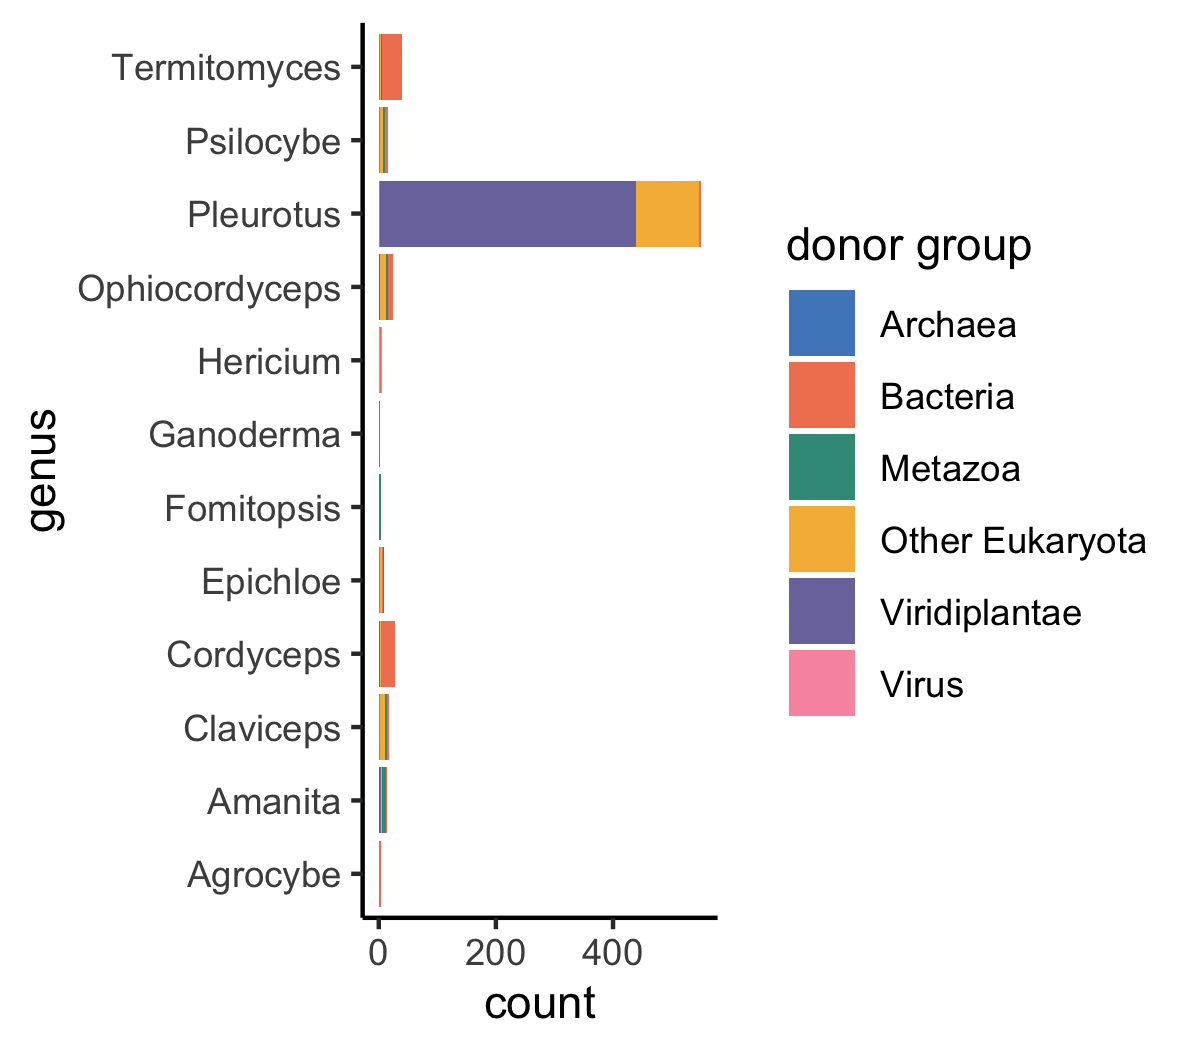

In [14]:
ggplot(results %>% filter(!is.na(blast_donor_group)), 
       aes(x = genus, fill = blast_donor_group)) +
  geom_bar() +
  theme_classic() +
  coord_flip() +
  scale_fill_manual(values = c('#5088C5', '#F28360', '#3B9886', '#F7B846', 
                               '#7A77AB', '#F898AE', '#C6E7F4', '#F8C5C1',
                               '#B5BEA4', '#F5E4BE', '#DCBFFC', '#F5CBE4',
                               '#DA9085', '#B6C8D4')) +
  labs(fill = "donor group") 

## plot COG groups for BLAST reuslts with eggnog annotations

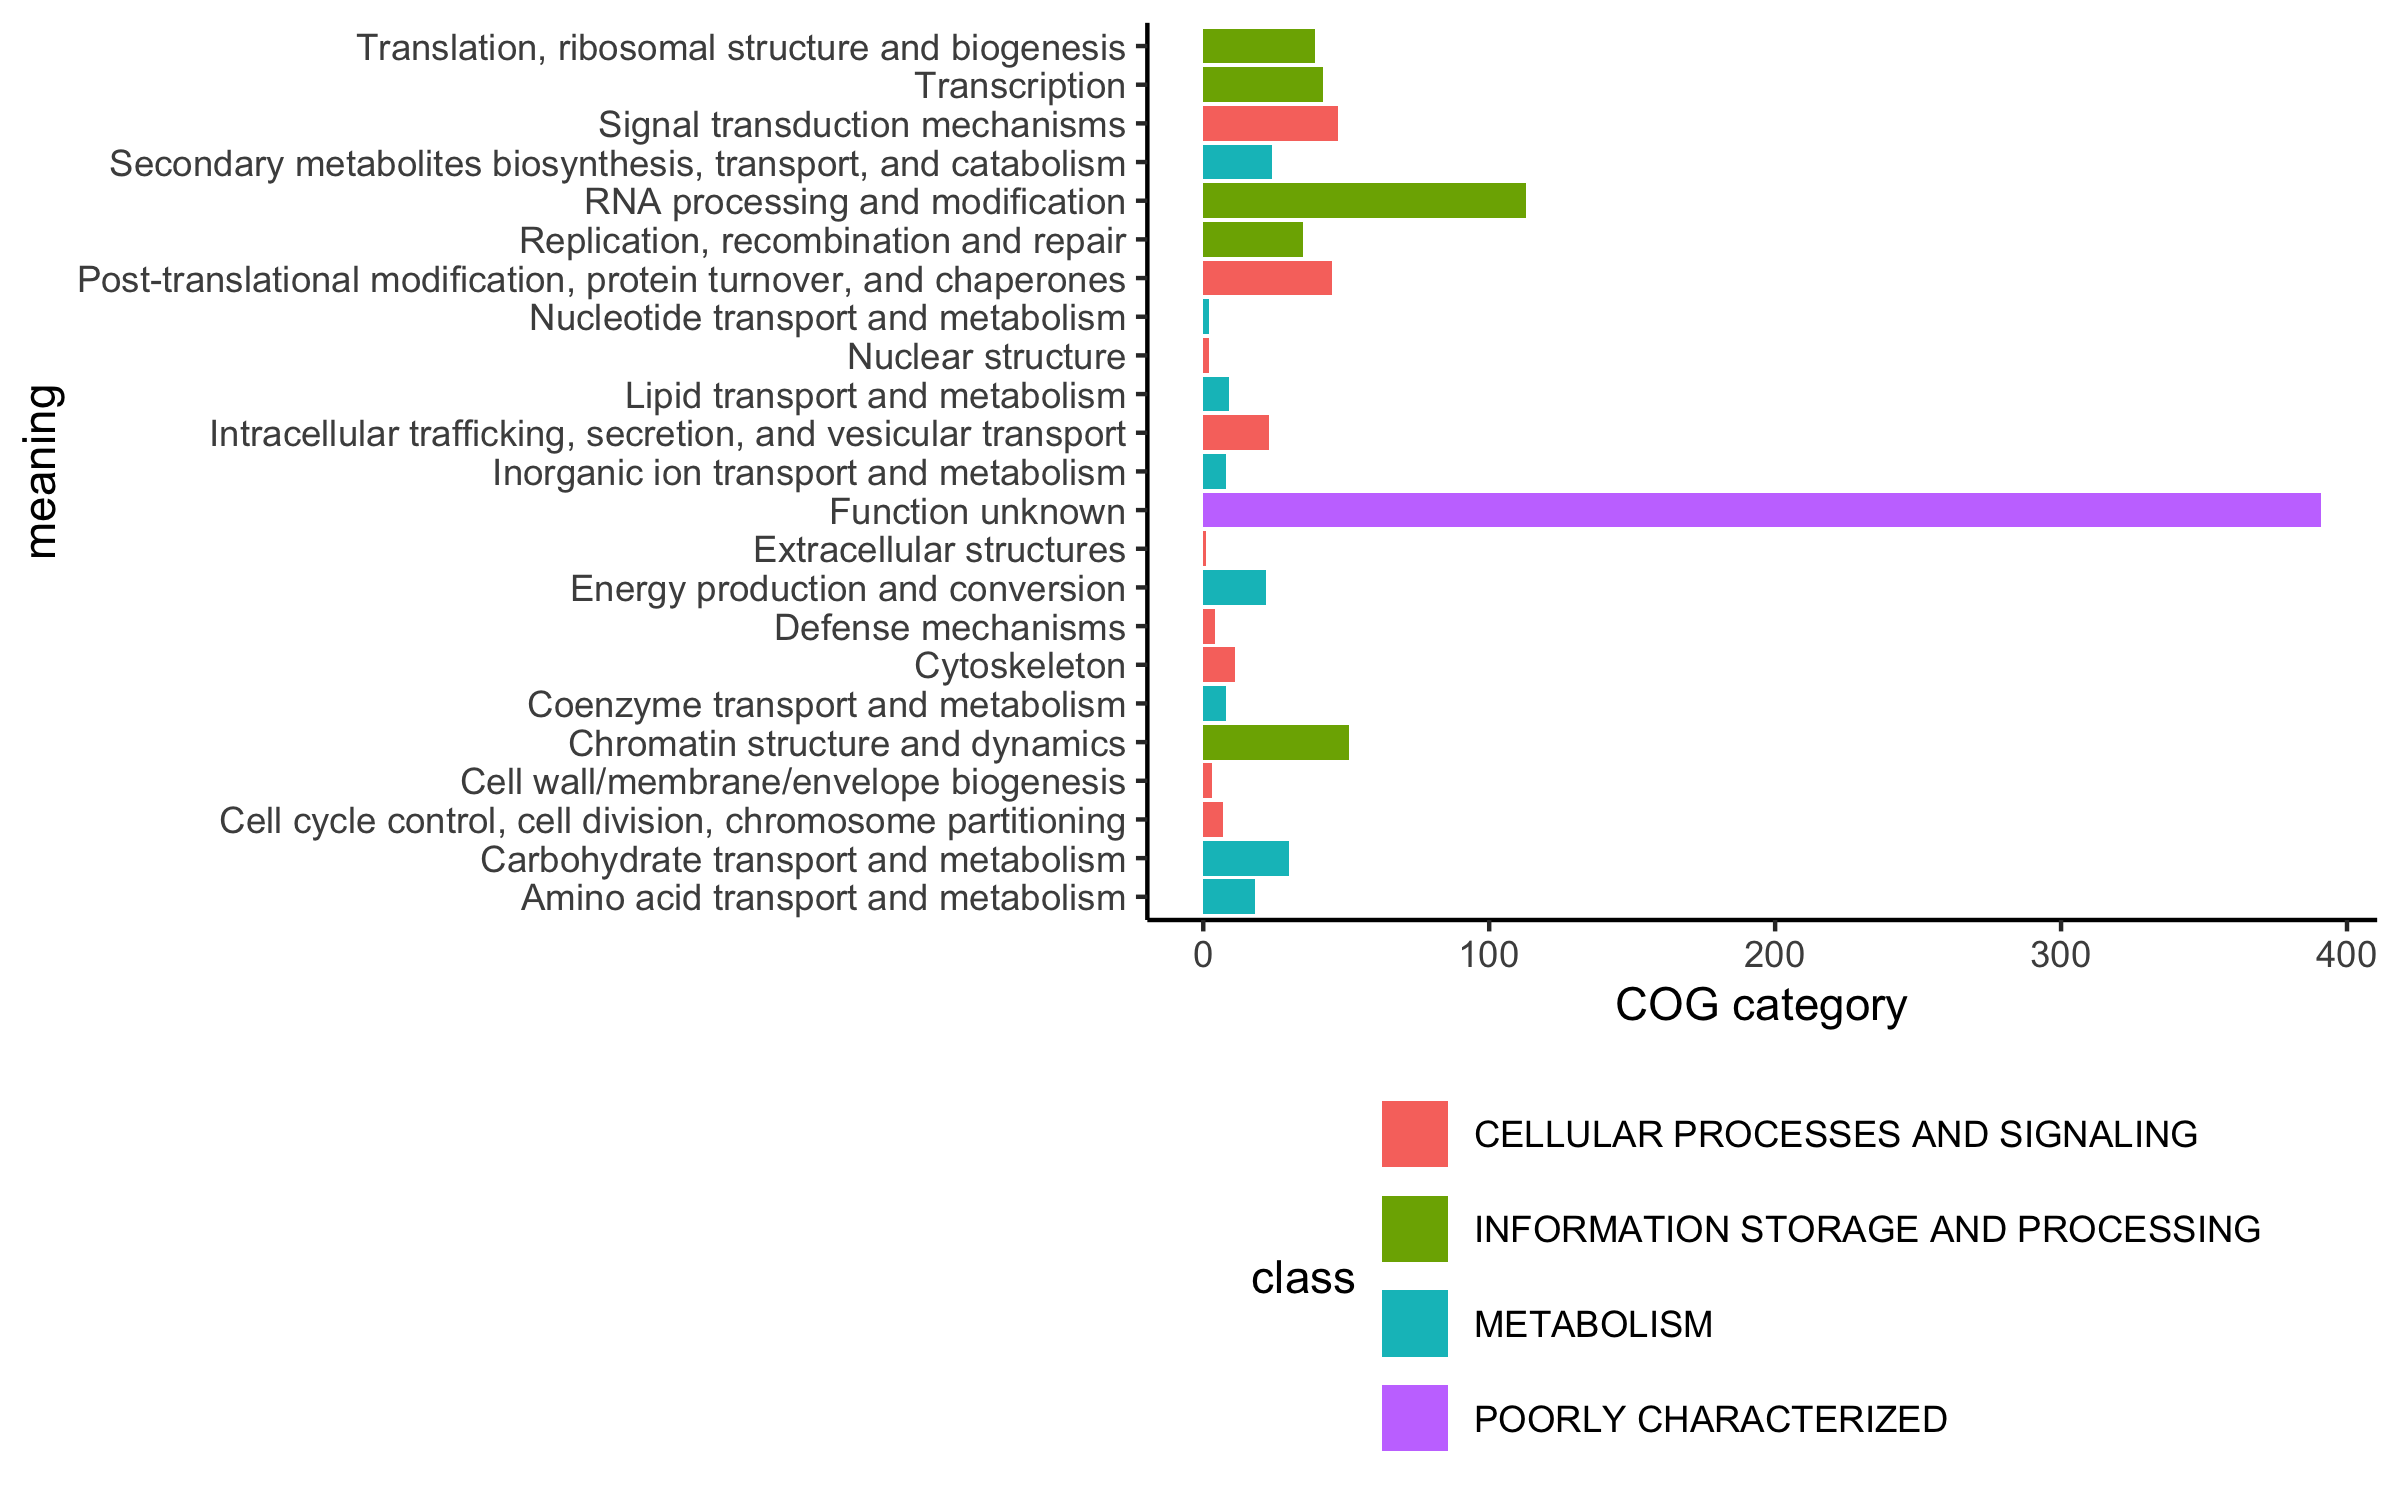

In [26]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)

cog <- read_csv('inputs/cog_definitions.csv', show_col_types = F)
ggplot(results %>% filter(!is.na(eggnog_cog_category)) %>%
         left_join(cog, by = c("eggnog_cog_category" = "abbreviation")) %>%
         filter(!is.na(meaning)),
       aes(x = meaning, fill = class)) +
  geom_bar() +
  theme_classic() +
  coord_flip() +
  theme(legend.position = 'bottom') +
  labs(y = "COG category") +
  guides(fill = guide_legend(nrow = 4, byrow=TRUE))

## Word cloud of BLAST results

In [20]:
tmp <- results %>%
  filter(!is.na(eggnog_description)) %>%
  filter(eggnog_description != "-") %>%
  filter(blast_HGT_score != "Likely contamination") %>%
  group_by(eggnog_description) %>%
  tally()

Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Protein of unknown function (DUF4246) could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“structural molecule activity could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Tetratricopeptide repeat could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“FAD dependent oxidoreductase could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Zinc-binding domain present in Lin-11, Isl-1, Mec-3. could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Serine/Threonine pr

Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“cysteine-type peptidase activity could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“DEAD-like helicases superfamily could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“DEAD/DEAH box helicase could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“DHS-like NAD FAD-binding domain-containing protein could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“DNA-dependent ATPase and 5'-3' DNA helicase required for the maintenance of both mitochondrial and nuclear genome stability. Efficiently unwinds G-quadruplex (G4) DNA structures and forked RNA-DNA 

Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“TLD-domain-containing protein could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“TonB dependent receptor could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Transferase family could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“WD40 repeat-containing protein could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Winged helix DNA-binding domain-containing protein could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, :
“Xeroderma pigmentosum G N-region could

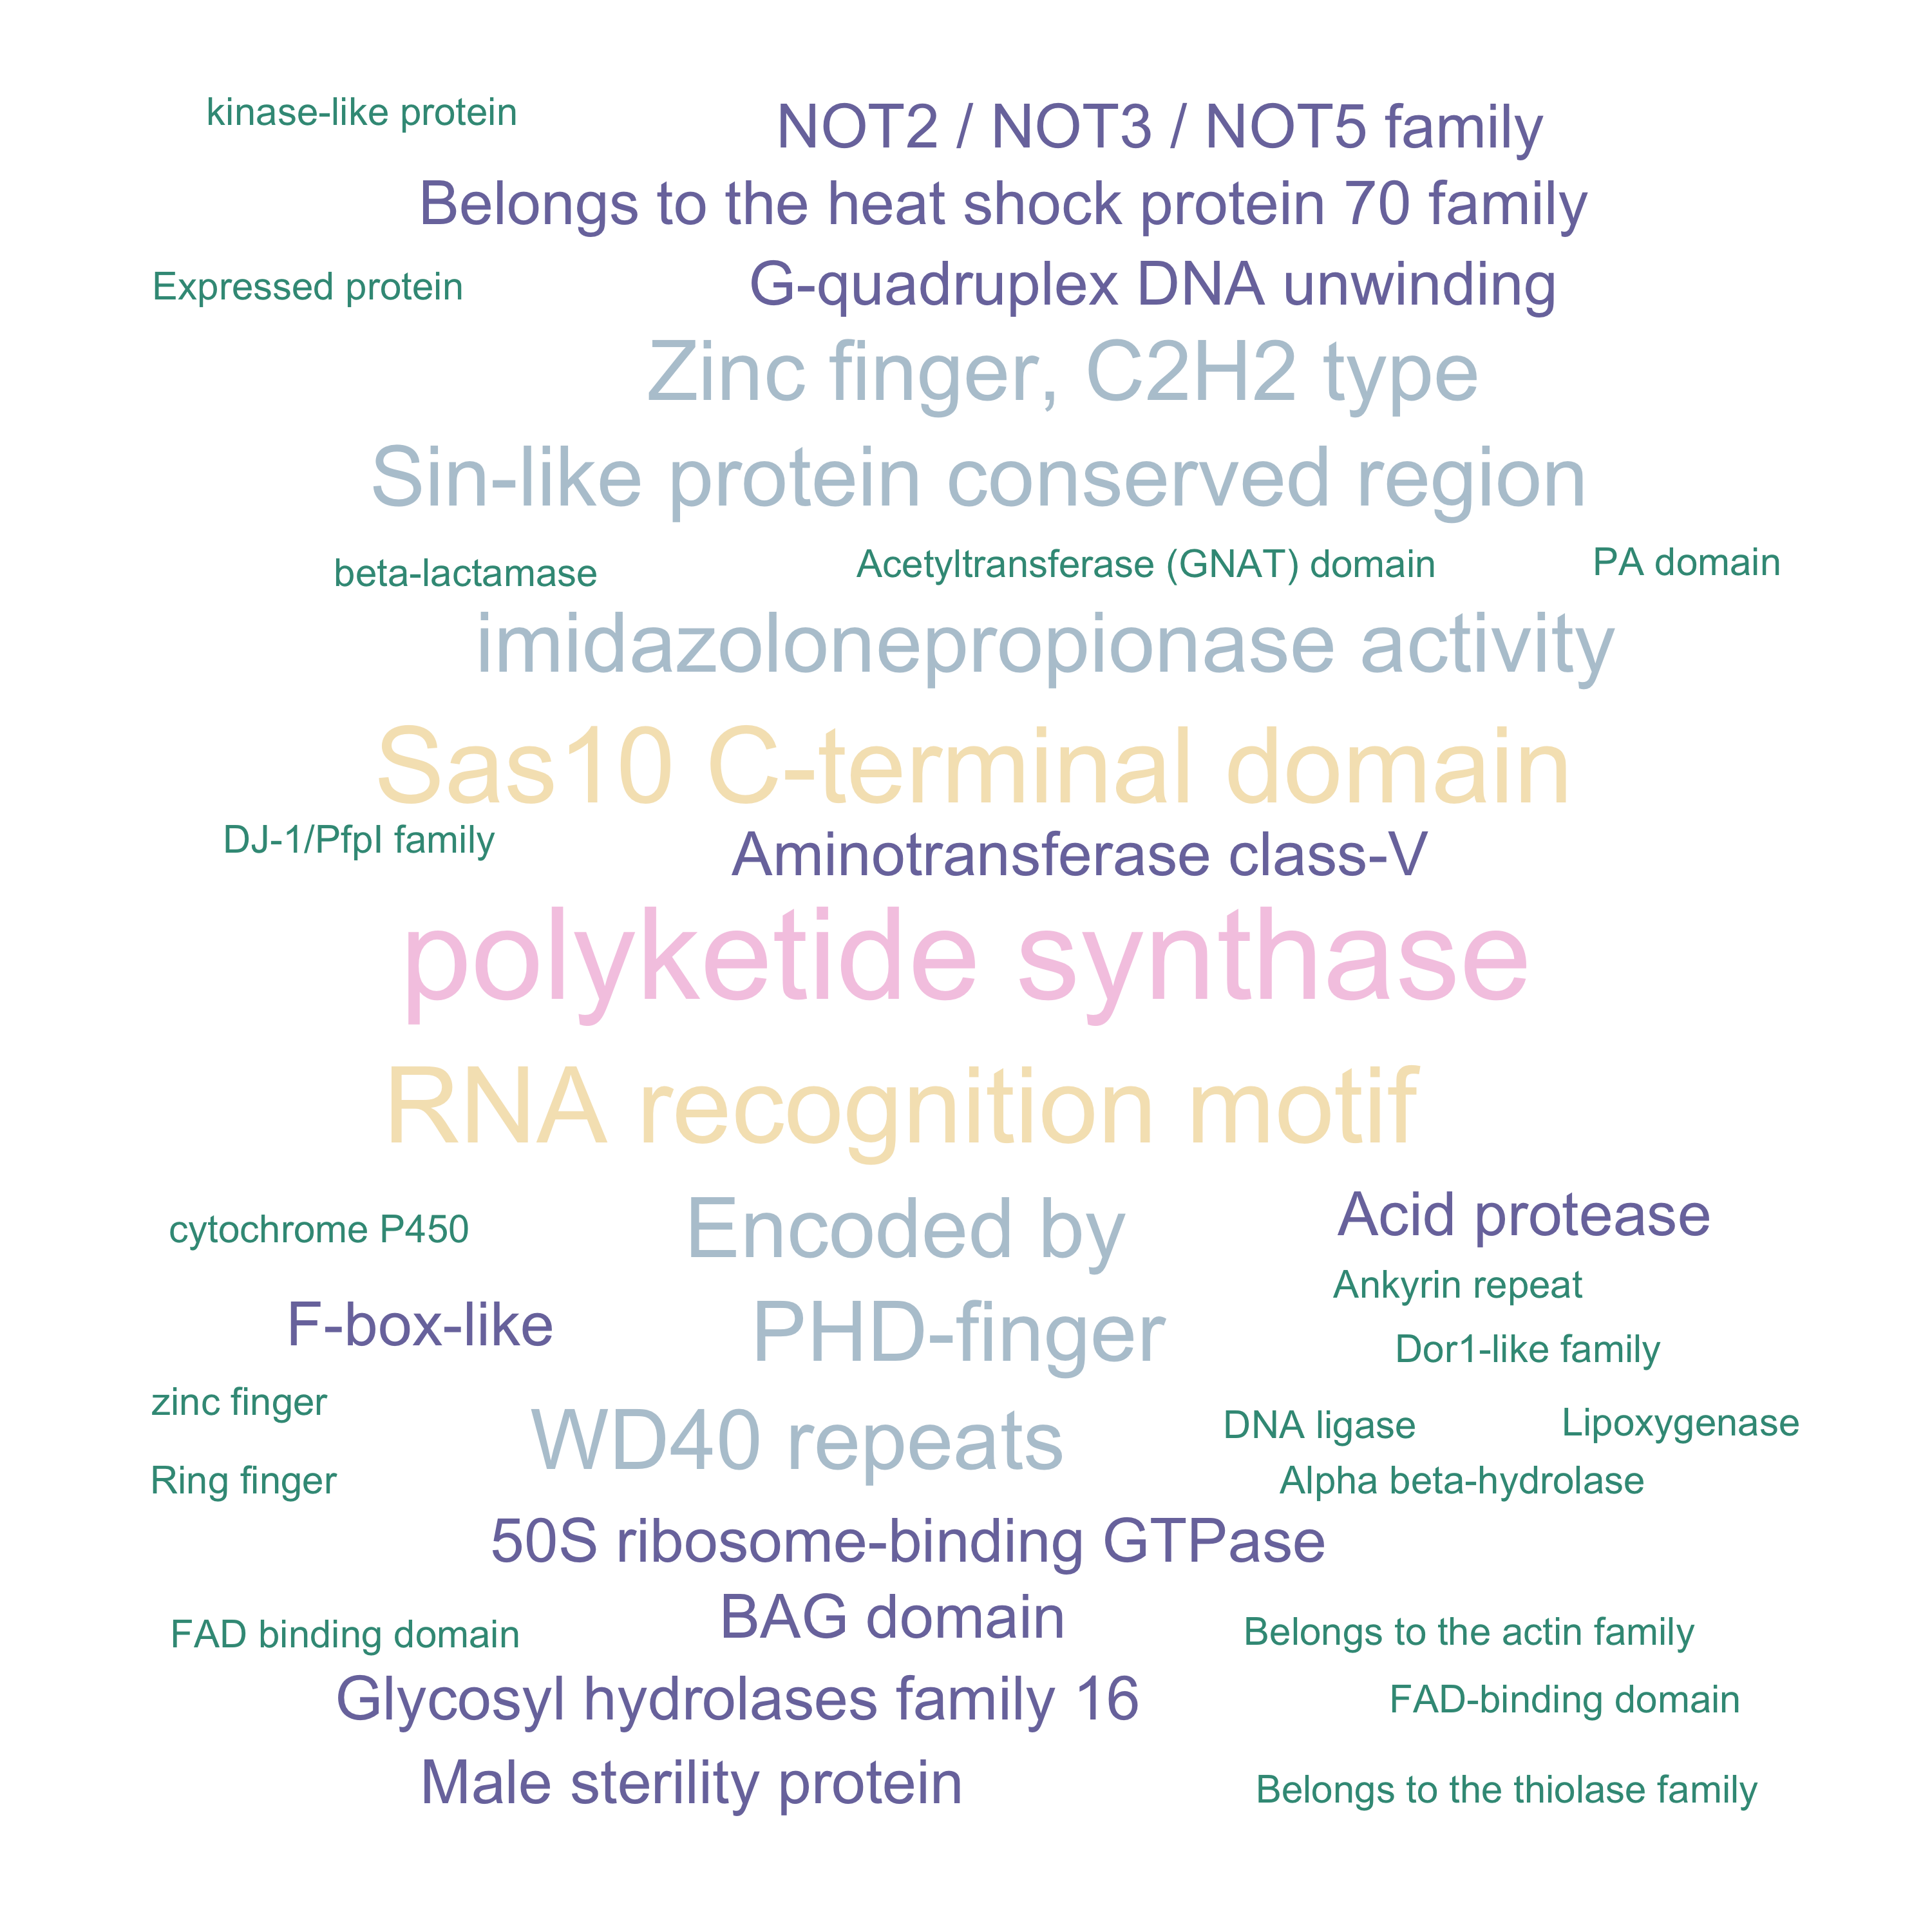

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

set.seed(1234) # for reproducibility 
#pdf("tmp_wordcloud.pdf", height = 12, width = 15)
wordcloud(words = tmp$eggnog_description, freq = tmp$n, min.freq = 0, max.words=200, 
          random.order=FALSE, rot.per=0, colors = c('#5088C5', '#F28360', '#3B9886', '#F7B846', 
                                                    '#7A77AB', '#F898AE', '#C6E7F4', '#B6C8D4',
                                                    '#B5BEA4', '#F5E4BE', '#DCBFFC', '#F5CBE4'))
#dev.off()

In [24]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] wordcloud_2.6      RColorBrewer_1.1-3 ggplot2_3.4.0      tidyr_1.2.1       
[5] dplyr_1.0.10       readr_2.1.3        purrr_1.0.1       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9       pillar_1.8.1     compiler_4.2.1   base64enc_0.1-3 
 [5] tools_4.2.1      bit_4.0.5        digest_0.6.31    uuid_1.1-0      
 [9] jsonlite_1.8.4   evaluate_0.20    lifecycle_1.0.3  tibble_3.1.8    
[13] gtable_0.3.1     pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1   
[17] cli_3.6.0        DBI_1.1.3        parallel_4.2.1   IRkernel_1.3    
[21] fastmap_1.1.0 